In [8]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import collections
from collections import Counter
from grafici import htlc_distribution, feebase_distribution, feerate_distribution

In [9]:
#leggo il grafo dal file .gml 
ln = nx.read_gml('grafodef.gml')

## *Def:*
### **min_htcl:** *valore minimo (espresso in msat) per cui un nodo è disposto a fare il forward di un pagamento*
### **fee_base:**  *tariffa fissa (espressa in mSat) addebitata su ogni transazione instradata attraverso un certo nodo*
### **fee_rate:** : *millisatoshi aggiuntivi richiesti per ogni milione di satoshi inviati*



In [10]:
#per calcolare le distribuzioni

htlc1 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC1') ]
htlc2 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC2')]
htlc = htlc1+htlc2 
feebase1 = [c for (u, v, c) in ln.edges.data('FEEBASE1')]
feebase2 = [c for (u, v, c) in ln.edges.data('FEEBASE2')]
feebase = feebase1 + feebase2
feerate1 = [int(c) for (u, v, c) in ln.edges.data('FEERATE1')]
feerate2 = [int(c) for (u, v, c) in ln.edges.data('FEERATE2')]
feerate = feerate1 + feerate2

In [11]:
htlccounter = collections.Counter(htlc)
feebasecounter = collections.Counter(feebase)
feeratecounter = collections.Counter(feerate)

### **HTLC**

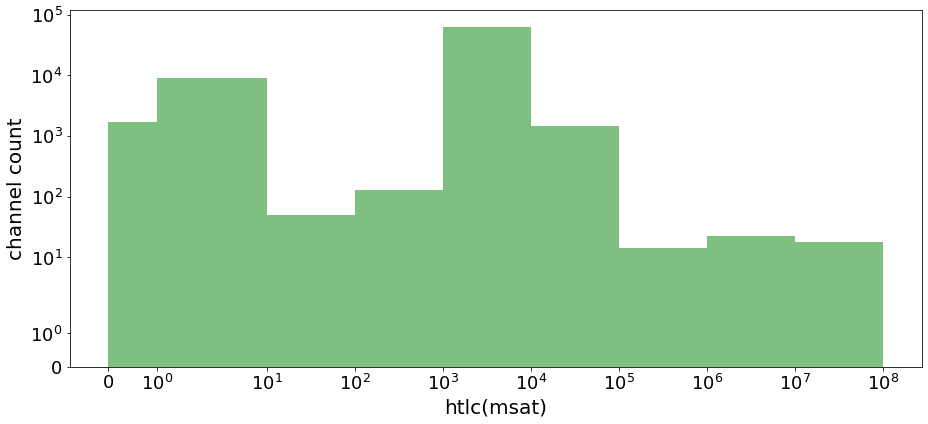

In [12]:
#calcolo istogramma della distrubuzione dei valori di htlc
htlc_distribution(htlc)

In [13]:
#percentuali dei canali 

zero = 0
uno = 0
dieci = 0
cento = 0
mille = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0


for key in htlccounter.keys():
    #if int(key) <= 0 :
    #    zero += htclcounter[key]
    if int(key) <= 1 :
        uno += htlccounter[key]
    if int(key) <= 10 :
        dieci += htlccounter[key]
    if int(key) <= 100 :
        cento += htlccounter[key]
    if int(key) <= 1000 :
        mille += htlccounter[key]
#   if int(key) <= 10000 :
#       diecimila += htclcounter[key]
    if int(key) <= 100000 :
        centok += htlccounter[key]
    if int(key) <= 1000000 :
        milione+= htlccounter[key]
    if int(key) <= 10000000 :
        dieciM+= htlccounter[key] 
    if int(key) <= 100000000 :
        centoM+= htlccounter[key]
        
print("La percentuale di canali con minhtlc <= 1 è ", str(round(uno*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10 è ", str(round(dieci*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100 è ", str(round(cento*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000 è ", str(round(mille*100/len(htlc),3)), "%")
#print("La percentuale di canali con minhtcl <= 10000 è ", str(round(diecimila*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtlc <= 100000 è ", str(round(centok*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000000 è ", str(round(milione*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10000000 è ", str(round(dieciM*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100000000 è ", str(round(centoM*100/len(htlc),3)), "%")


La percentuale di canali con minhtlc <= 1 è  25.539 %
La percentuale di canali con minhtlc <= 10 è  25.574 %
La percentuale di canali con minhtlc <= 100 è  25.723 %
La percentuale di canali con minhtlc <= 1000 è  98.171 %
La percentuale di canali con minhtlc <= 100000 è  99.948 %
La percentuale di canali con minhtlc <= 1000000 è  99.979 %
La percentuale di canali con minhtlc <= 10000000 è  99.994 %
La percentuale di canali con minhtlc <= 100000000 è  100.0 %


### **FEE_BASE**

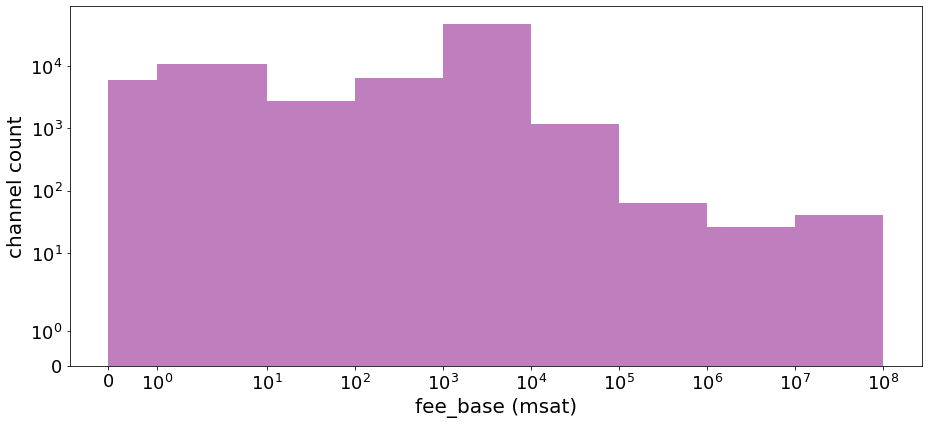

In [14]:
feebase_distribution(feebase)

In [15]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0
miliardo = 0

for key in feebasecounter.keys():
    if int(key) <= 1 :
        uno += feebasecounter[key]
    if int(key) <= 10 :
        dieci += feebasecounter[key]
    if int(key) <= 100 :
        cento += feebasecounter[key]
    if int(key) <= 1000 :
        mille += feebasecounter[key]
    if int(key) <= 100000 :
        centok += feebasecounter[key]
    if int(key) <= 1000000 :
        milione += feebasecounter[key]
    if int(key) <= 10000000 :
        dieciM += feebasecounter[key]
    if int(key) <= 100000000:
        centoM += feebasecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feebasecounter[key]
        
        
print("La percentuale di canali con feebase <= 1 è ", str(round(uno*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10 è ", str(round(dieci*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100 è ", str(round(cento*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000 è ", str(round(mille*100/len(feebase),3)), "%")
#print("La percentuale di canali con feebase <= 10000 è ", str(round(diecimila*100/len(feerate),3)), "%")
print("La percentuale di canali con feebase <= 100000 è ", str(round(centok*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000 è ", str(round(milione*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10000000 è ", str(round(dieciM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100000000 è ", str(round(centoM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000000 è ", str(round(miliardo*100/len(feebase),3)), "%")

La percentuale di canali con feebase <= 1 è  31.271 %
La percentuale di canali con feebase <= 10 è  33.538 %
La percentuale di canali con feebase <= 100 è  37.188 %
La percentuale di canali con feebase <= 1000 è  93.322 %
La percentuale di canali con feebase <= 100000 è  99.874 %
La percentuale di canali con feebase <= 1000000 è  99.908 %
La percentuale di canali con feebase <= 10000000 è  99.967 %
La percentuale di canali con feebase <= 100000000 è  99.97 %
La percentuale di canali con feebase <= 1000000000 è  100.0 %


### **FEE_RATE**

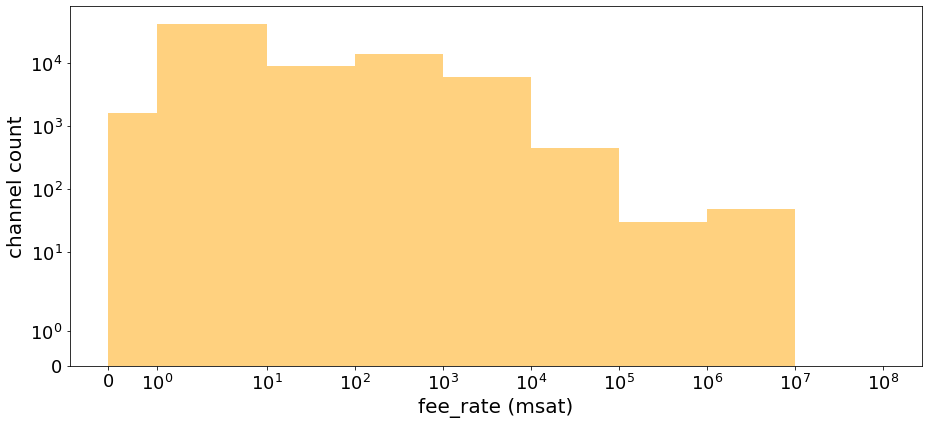

In [16]:
feerate_distribution(feerate)

In [17]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
miliardo = 0

for key in feeratecounter.keys():
    if int(key) <= 1 :
        uno += feeratecounter[key]
    if int(key) <= 10 :
        dieci += feeratecounter[key]
    if int(key) <= 100 :
        cento += feeratecounter[key]
    if int(key) <= 1000 :
        mille += feeratecounter[key]
    if int(key) <= 10000 :
        diecik += feeratecounter[key]
    if int(key) <= 100000 :
        centok += feeratecounter[key]
    if int(key) <= 1000000 :
        milione += feeratecounter[key]
    if int(key) <= 10000000 :
        dieciM += feeratecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feeratecounter[key]
        
        
print("La percentuale di canali con feerate <= 1 è ", str(round(uno*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10 è ", str(round(dieci*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100 è ", str(round(cento*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000 è ", str(round(mille*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000 è ", str(round(diecik*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100000 è ", str(round(centok*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000 è ", str(round(milione*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000000 è ", str(round(dieciM*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000000 è ", str(round(miliardo*100/len(feerate),3)), "%")

La percentuale di canali con feerate <= 1 è  63.441 %
La percentuale di canali con feerate <= 10 è  68.719 %
La percentuale di canali con feerate <= 100 è  79.275 %
La percentuale di canali con feerate <= 1000 è  96.043 %
La percentuale di canali con feerate <= 10000 è  99.465 %
La percentuale di canali con feerate <= 100000 è  99.881 %
La percentuale di canali con feerate <= 1000000 è  99.95 %
La percentuale di canali con feerate <= 10000000 è  99.962 %
La percentuale di canali con feerate <= 1000000000 è  99.998 %


# ***ROOTS***

In [18]:
root_prop= {} #struttura per memorizzare i nodi radice e le loro proprietà

for node in ln.nodes():
    
    for n in ln.neighbors(node): #scorro i vicini
        if ln.degree(n) == 1: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
            root_prop[node] = {'degree': int, 'roses': [], 'blue': [], 'percent_roses': int } 
    
    #if one == 1: #se tutti i vicini hanno grado = 1 (sono rose)
        

for node in root_prop.keys():
    for n in ln.neighbors(node): 
        if ln.degree(n) == 1:
            root_prop[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop[node]['degree'] = (ln.degree(node))
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop[node]['percent_roses']=(float(len(root_prop[node]['roses']) / ln.degree(node) * 100)) 

In [19]:
print(len(root_prop))

1043


In [20]:
#memorizzo la componente principale
largest_component = ln.subgraph(max(nx.connected_components(ln),key=len))
nx.write_gml(largest_component, "largest_component.gml") 

In [21]:
ln_largest = nx.read_gml("largest_component.gml")

In [73]:
#applico l'algoritmo di ricerca dei nodi radice solo alla componente principale, mi aspetto che vengano individuati meno nodi 
#rispetto al caso precedente che presumibilmente individuava anche i nodi "nel contorno della rete"

root_prop_largest = {} #struttura per memorizzare i nodi radice e le loro proprietà

nodes = [node for node in largest_component.nodes()]# if largest_component.degree(node) >=2]

for node in nodes:
    for n in largest_component.neighbors(node): #scorro i vicini
        if largest_component.degree(n) == 1: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
            root_prop_largest[node] = {'degree': int, 'roses': [], 'due': [], 'blue': [], 'percent_roses': int} 
        

for node in root_prop_largest.keys():
    for n in largest_component.neighbors(node): 
        if largest_component.degree(n) == 1:
            root_prop_largest[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        elif largest_component.degree(n) == 2:
            root_prop_largest[node]['due'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop_largest[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop_largest[node]['degree'] = largest_component.degree(node)
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop_largest[node]['percent_roses'] = float(len(root_prop_largest[node]['roses']) / largest_component.degree(node) * 100)


In [74]:
len(root_prop_largest)

1602

### Aggiungo attributo 'ISROOT' ai nodi radice per visualizzazione con graphia

In [71]:
node_attr = {}

for node in largest_component.nodes():
    new = {'ISROOT' : 1 if node in root_prop_largest.keys() else 0}
    node_attr[node] = new
nx.set_node_attributes(largest_component, node_attr)


In [72]:
nx.write_gml(largest_component, "grafo_root.gml")

In [46]:
#?
#memorizzo i nodi che sono collegati a più nodi rossi (rose) che blu
selected_nodes = {}

for node in root_prop_largest.keys():
    if(root_prop_largest[node]['percent_roses'] > 40 and largest_component.degree(node) >=4 ):
        selected_nodes[node]= root_prop_largest[node]

In [47]:
len(selected_nodes)

30

In [48]:
#provo ad individuare altri nodi radice
bouquet_roots = {}

for n in largest_component.nodes():
    #considero come rose nodi di grado 2 
    roses = [nbr for nbr in largest_component.neighbors(n) if largest_component.degree(nbr) == 2]

    if(len(roses) == 2):
        
        bouquet_roots[n] = {'degree' : int, 'roses2': []}

        bouquet_roots[n]['degree'] = (largest_component.degree(n))
        bouquet_roots[n]['roses2'].append(roses[0])
        bouquet_roots[n]['roses2'].append(roses[1])


In [49]:
roots2 = {}
nodi = []

for n in bouquet_roots.keys():

    roots2[n] = {'neig_0' : [], 'neig_1': []}

    n0 = [nbr for nbr in largest_component.neighbors(bouquet_roots[n]['roses2'][0])]
    n1 = [nbr for nbr in largest_component.neighbors(bouquet_roots[n]['roses2'][1])]

    roots2[n]['neig_0'] = n0
    roots2[n]['neig_1'] = n1

    if( bouquet_roots[n]['roses2'][1] in n0 and n in n0 and bouquet_roots[n]['roses2'][0] in n1 and n in n1):
        nodi.append(n)

In [65]:
#provo a trovare altri nodi radice:

roots = []
for n in largest_component.nodes(): #per ogni nodo del grafo
    if n not in root_prop_largest.keys(): #se non compare nella struttura dei nodi roots

        neighborgs = [nbr for nbr in largest_component.neighbors(n)] #memorizzo i suoi vicini

        #se tra i vicini del nodo ci sono almeno 3 nodi radice 
        if(len(set(neighborgs) & set(root_prop_largest.keys())) >=5 and largest_component.degree(n) <=5) :
            roots.append(n)


In [66]:
len(roots)

90

In [67]:
node_attr = {}

for node in largest_component.nodes():
    new = {'ISROOT' : 1 if node in root_prop_largest.keys() or node in roots else 0}
    node_attr[node] = new
nx.set_node_attributes(largest_component, node_attr)


In [68]:
nx.write_gml(largest_component, "grafo_root2.gml")